## Análisis Exploratorio de Datos del Dataset Telco Customer Churn

*Fuente*: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [4]:
#Importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


### **Carga y Limpieza de Datos**

In [5]:
#Importamos el dataset de telco para analisar el churn

url = 'https://raw.githubusercontent.com/MarioSolano98/eda_course/refs/heads/main/data/Telco-Customer-Churn.csv'

df_customer_churn = pd.read_csv(url)

#Corregimos tipos a numericos
df_customer_churn['tenure'] = df_customer_churn['tenure'].astype('completar con el tipo')
df_customer_churn['TotalCharges'] = df_customer_churn['TotalCharges'].astype(str).replace(' ', '0').astype('completar con el tipo')

In [6]:
#Revisamos la informacion del dataset

print(df_customer_churn.describe().to_markdown())
print('\n')

#Revsiamos las columnas del dataset
print(df_customer_churn.info())
print('\n')

# Análisis de valores nulos
print(df_customer_churn.isnull().sum().to_markdown())
print('\n')

# Revisamos los primeros 5 registros
print(df_customer_churn.head().to_markdown())

|       |   SeniorCitizen |    tenure |   MonthlyCharges |   TotalCharges |
|:------|----------------:|----------:|-----------------:|---------------:|
| count |     7043        | 7043      |        7043      |        7043    |
| mean  |        0.162147 |   32.3711 |          64.7617 |        2279.73 |
| std   |        0.368612 |   24.5595 |          30.09   |        2266.79 |
| min   |        0        |    0      |          18.25   |           0    |
| 25%   |        0        |    9      |          35.5    |         398.55 |
| 50%   |        0        |   29      |          70.35   |        1394.55 |
| 75%   |        0        |   55      |          89.85   |        3786.6  |
| max   |        1        |   72      |         118.75   |        8684.8  |


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null 

# Descripción de las variables

| Columna | Descripción |
|---|---|
| customerID | Identificador único asignado a cada cliente. |
| gender | Género del cliente (masculino o femenino). |
| SeniorCitizen | Indica si el cliente es un ciudadano de la tercera edad (sí o no). |
| Partner | Indica si el cliente tiene pareja (sí o no). |
| Dependents | Indica si el cliente tiene dependientes (hijos, etc.) (sí o no). |
| tenure | Número de meses que el cliente ha sido suscriptor. |
| PhoneService | Indica si el cliente tiene servicio de teléfono (sí o no). |
| MultipleLines | Indica si el cliente tiene múltiples líneas telefónicas (sí o no). |
| InternetService | Tipo de servicio de internet (DSL, fibra óptica, ninguno). |
| OnlineSecurity | Indica si el cliente tiene un servicio de seguridad en línea (sí o no). |
| OnlineBackup | Indica si el cliente tiene un servicio de copia de seguridad en línea (sí o no). |
| DeviceProtection | Indica si el cliente tiene un servicio de protección de dispositivos (sí o no). |
| TechSupport | Indica si el cliente tiene un servicio de soporte técnico (sí o no). |
| StreamingTV | Indica si el cliente tiene un servicio de streaming de TV (sí o no). |
| StreamingMovies | Indica si el cliente tiene un servicio de streaming de películas (sí o no). |
| Contract | Tipo de contrato del cliente (mensual, un año, dos años). |
| PaperlessBilling | Indica si el cliente prefiere la facturación electrónica (sí o no). |
| PaymentMethod | Método de pago del cliente (tarjeta de crédito, cheque electrónico, etc.). |
| MonthlyCharges | Cargo mensual total del cliente. |
| TotalCharges | Cargo total acumulado del cliente. |
| Churn | Indica si el cliente ha cancelado el servicio (sí o no). |

### **Análisis Exploratorio de Datos Univariado**

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


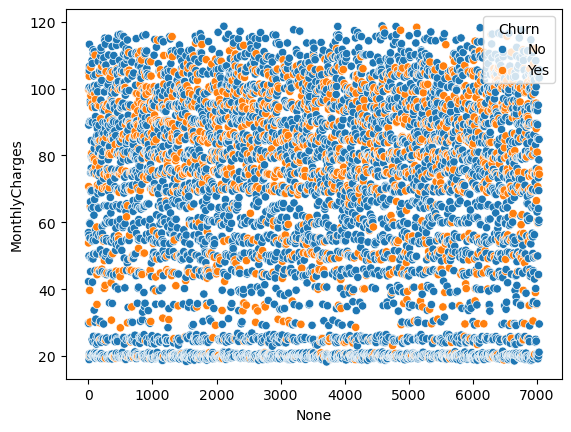

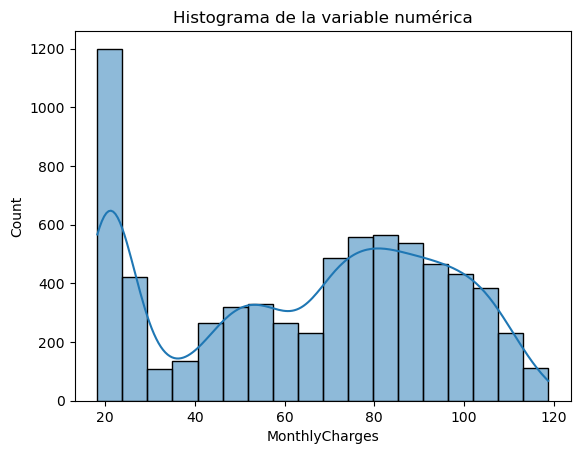

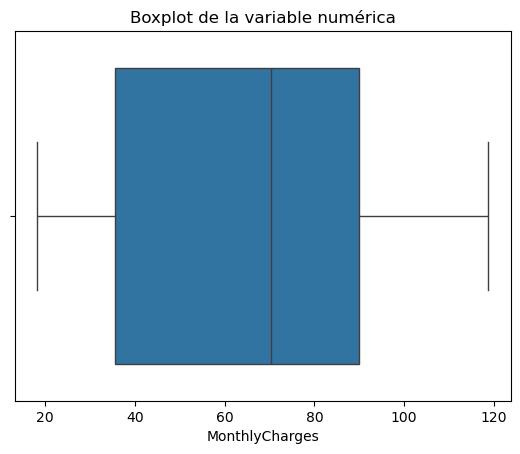

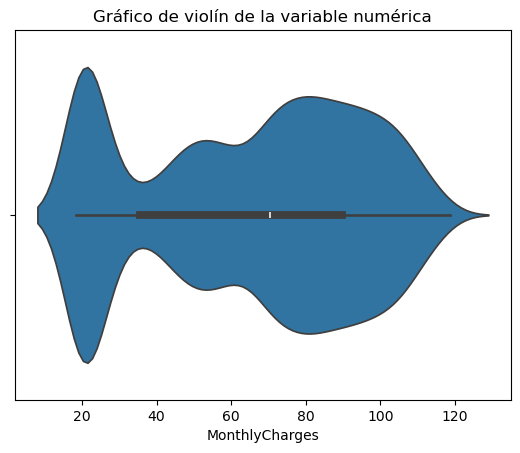

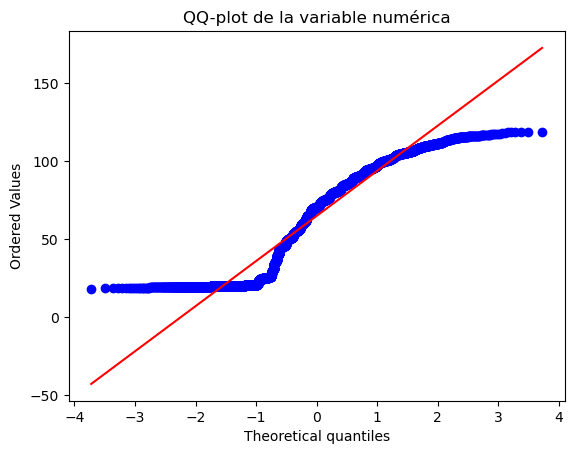

Asimetría: -0.22052443394398033
Kurtosis: -1.2572596945495056
Outliers: Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [7]:
#Analisis para una variable numerica (MonthlyCharges)

# 1. Estadísticos descriptivos básicos
print(df_customer_churn['MonthlyCharges']) #completar con el metodo para describir la variable)

# 2. Visualización de la distribución
sns.scatterplot(x = df_customer_churn.index, y = df_customer_churn['Completar con la variable'],hue=df_customer_churn['Churn'])
plt.show()

# 3. Visualización de la distribución
sns.histplot(df_customer_churn['Completar con la variable'], kde=True)
plt.title('Histograma de la variable numérica')
plt.show()

# 4. Boxplot para identificar outliers
sns.boxplot(x=df_customer_churn['Completar con la variable'])
plt.title('Boxplot de la variable numérica')
plt.show()

# 5. Gráfico de violín para una visualización más detallada
sns.violinplot(x=df_customer_churn['Completar con la variable'])
plt.title('Gráfico de violín de la variable numérica')
plt.show()

# 6. QQ-plot para evaluar la normalidad
from scipy import stats
stats.probplot(df_customer_churn['Completar con la variable'], plot=plt)
plt.title('QQ-plot de la variable numérica')
plt.show()

# 7. Medidas de asimetría y kurtosis
print('Asimetría:', df_customer_churn['MonthlyCharges'].) #Completar con el metodo para calcular la asimetria
print('Kurtosis:', df_customer_churn['MonthlyCharges'].) #Completar con el metodo para calcular la kurtosis

# 8. Identificación de outliers (por ejemplo, utilizando IQR)
Q1 = df_customer_churn['MonthlyCharges']. #Completar con el metodo para calcular el cuantil 25
Q3 = df_customer_churn['MonthlyCharges']. #Completar con el metodo para calcular el cuantil 75
IQR = Q3 - Q1
outliers = df_customer_churn[(df_customer_churn['MonthlyCharges'] < Q1 - 1.5*IQR) | (df_customer_churn['MonthlyCharges'] > Q3 + 1.5*IQR)]
print('Outliers:', outliers)



count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


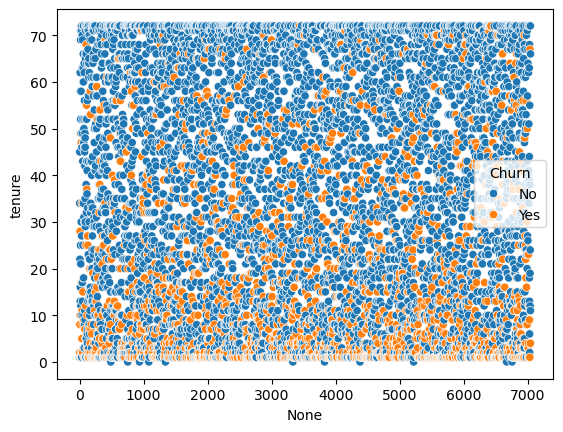

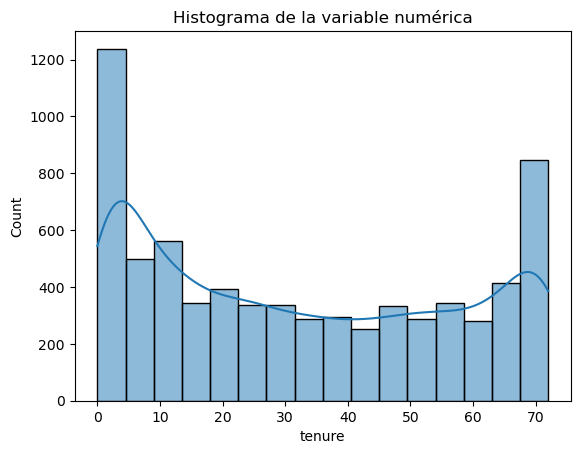

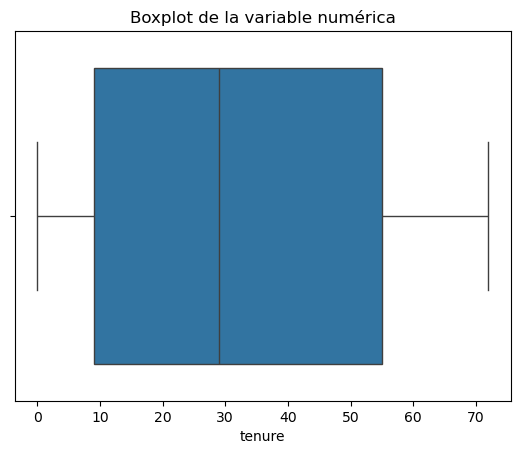

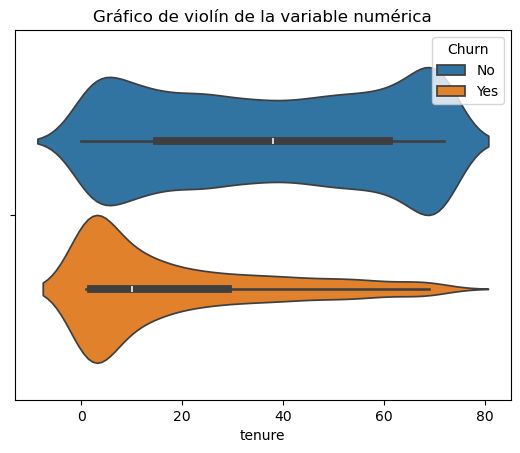

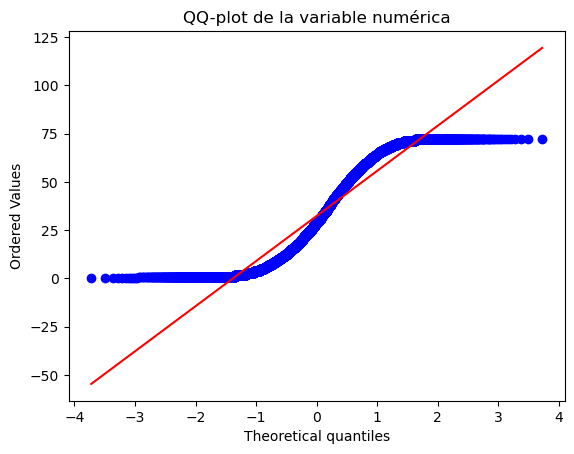

Asimetría: 0.2395397495619829
Kurtosis: -1.387371635971685
Outliers: Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [8]:
#Analisis para una variable numerica tenure

# 1. Estadísticos descriptivos básicos
print(df_customer_churn['Completar con la variable'].) #Completar con el metodo para describir la variable

# 2. Visualización de la distribución
sns.scatterplot(x = df_customer_churn.index, y = df_customer_churn['Completar con la variable'],hue=df_customer_churn['Churn'])
plt.show()

# 3. Visualización de la distribución
sns.histplot(df_customer_churn['Completar con la variable'], kde=True)
plt.title('Histograma de la variable numérica')
plt.show()

# 4. Boxplot para identificar outliers
sns.boxplot(x=df_customer_churn['Completar con la variable'])
plt.title('Boxplot de la variable numérica')
plt.show()

# 5. Gráfico de violín para una visualización más detallada
sns.violinplot(x=df_customer_churn['Completar con la variable'],hue=df_customer_churn['Churn'])
plt.title('Gráfico de violín de la variable numérica')
plt.show()

# 6. QQ-plot para evaluar la normalidad
from scipy import stats
stats.probplot(df_customer_churn['Completar con la variable'], plot=plt)
plt.title('QQ-plot de la variable numérica')
plt.show()

# 7. Medidas de asimetría y kurtosis
print('Asimetría:', df_customer_churn['tenure'].) #Completar el con metodo para calcular la asimetria 
print('Kurtosis:', df_customer_churn['tenure'].) #Completar con el metodo para calcular la kurtosis

# 8. Identificación de outliers (por ejemplo, utilizando IQR)
Q1 = df_customer_churn['tenure']. #Completar con el metodo para calcular el cuantil 25
Q3 = df_customer_churn['tenure']. #Completar con el metodo para calcular el cuantil 75
IQR = Q3 - Q1
outliers = df_customer_churn[(df_customer_churn['tenure'] < Q1 - 1.5*IQR) | (df_customer_churn['tenure'] > Q3 + 1.5*IQR)]
print('Outliers:', outliers)

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
MultipleLines
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: count, dtype: float64


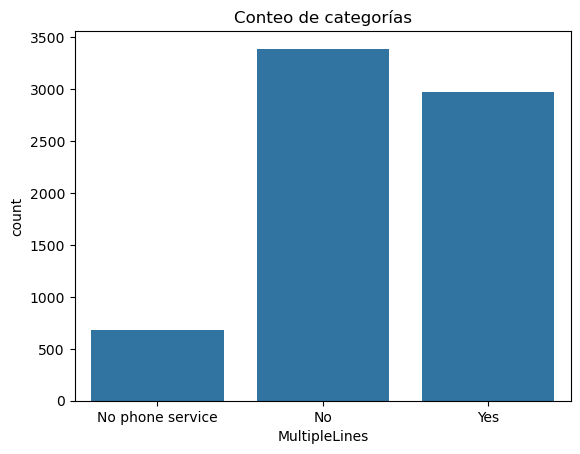

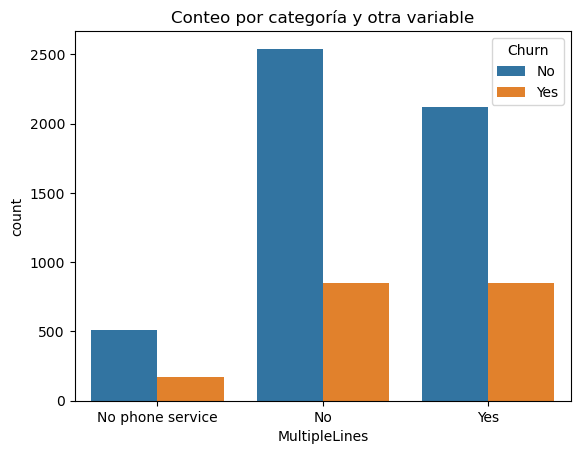

Churn,No,Yes
MultipleLines,,
No,2541,849
No phone service,512,170
Yes,2121,850


In [9]:
#Análisis para una variable categórica

# 1. Frecuencias absolutas y relativas
freq = df_customer_churn['MultipleLines']. #Completar con el metodo para calcular la frecuencia: value_counts
print(freq)
print(freq / len(df_customer_churn))


# 2. Visualización de la distribución
sns.countplot(x='MultipleLines', data=df_customer_churn)
plt.title('Conteo de categorías')
plt.show()

# 3. Gráfico de barras apiladas (si tienes otra variable categórica)
sns.countplot(x='MultipleLines', hue='Utilizar Churn para separar las variables', data=df_customer_churn)
plt.title('Conteo por categoría y otra variable')
plt.show()

# 4. Tabla de frecuencias cruzadas (si tienes otra variable categórica)
pd.crosstab(df_customer_churn['MultipleLines'], df_customer_churn['Utilizar Churn para separar las variables'])


### **Análisis Exploratorio de Datos Bivariado/Multivariado**

In [10]:
#Revisamos el dataset
df_customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


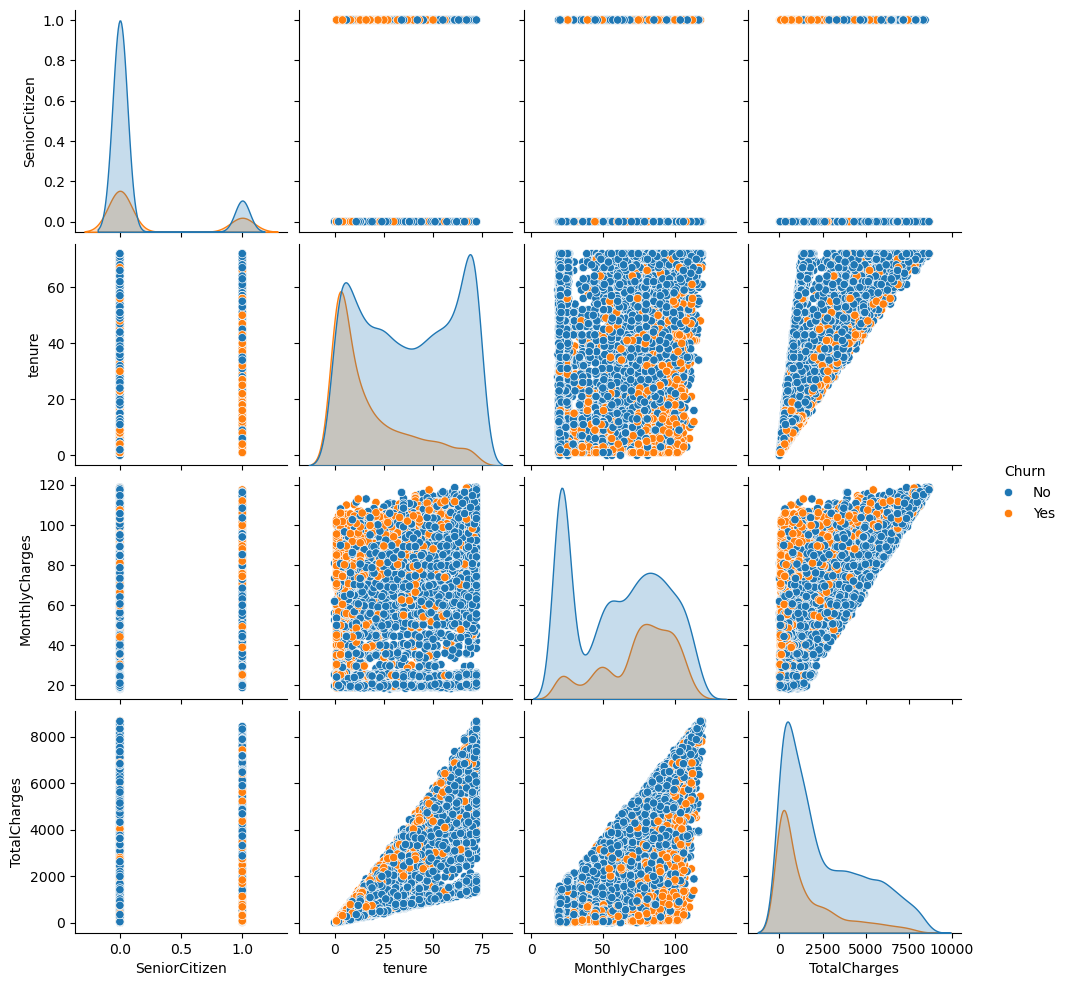

In [11]:
#Revisamos las columnas numericas del dataset usando el churn como diferenciador
sns.(df_customer_churn, hue='Churn') #Completar para visrualizar un pairplot

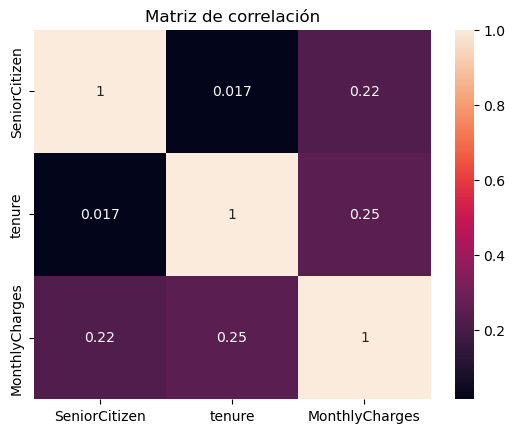

In [12]:
# Matriz de correlación de las variables numericas, no se observa una correlacion fuerte entre las variables
corr_matrix = df_customer_churn[['SeniorCitizen', 'tenure', 'MonthlyCharges']]. #Completar con el metodo para calcular la matriz de correlacion
sns.heatmap(corr_matrix, annot=True)
plt.title('Matriz de correlación')
plt.show()